## Report project basic of mobile robotics - group 17
### About us

### Project description

### Code implementation
##### 0. Import needed libraries


In [2]:
from vision.map import * # Import map library
from tdmclient import ClientAsync # Import thymio library
from utils.exceptions import * # Import exceptions
from global_navigation.main import *
from vision.camera import *
from utils.settings import *
import time
import math

## 1. Computer Vision
### 1.1. Map creation
#### 1.1.1 Data loading and needed variables initialization

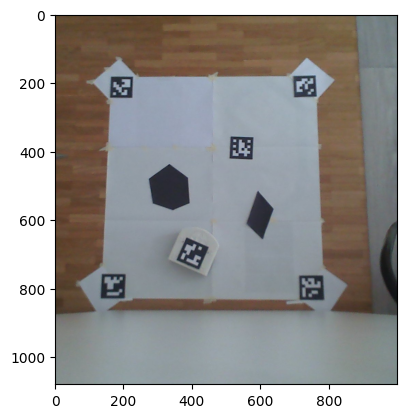

In [3]:
# Prepare data for the demo
camera_frame_path = "report_images/vision/camera_frame.jpg"

# Initialize the map (load an image from a file) 
cam = Camera(frame_path=camera_frame_path)
frame,_ = cam.get_frame()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(frame[:,500:1500,:])
plt.show()

#### 1.1.2 Corners detection and definition of the transformation matrix 

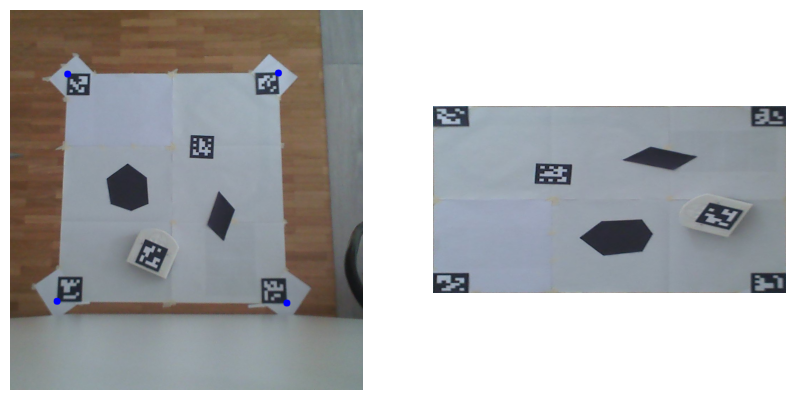

In [4]:
# Detect the corners markers
markers = Marker()
detected_markers = markers.detect(cam,n_iterations=1)
frame_with_markers = frame.copy()
# Display the coordinates of the markers on the image
for k in detected_markers.keys():
    if k in IDS_CORNER_MARKERS:
        marker = detected_markers[k]
        # Draw the origin of the marker with a different color
        cv2.circle(frame_with_markers,tuple(np.array(marker["points"][0]).astype(int)),10,(0,0,255),-1)

# Use the markers found to compute a transformation matrix such the corner markers are in the vertices of a square
_,frame_cut = cam.get_frame()
frame_cut = cv2.cvtColor(frame_cut, cv2.COLOR_BGR2RGB)

# Display frame with markers next to frame_cut
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(frame_with_markers[:,500:1500,:])
ax[1].imshow(frame_cut)
# Remove the axis
for a in ax:
    a.axis("off")
plt.show()

#### 1.1.3 Obstacles detection and enlargement

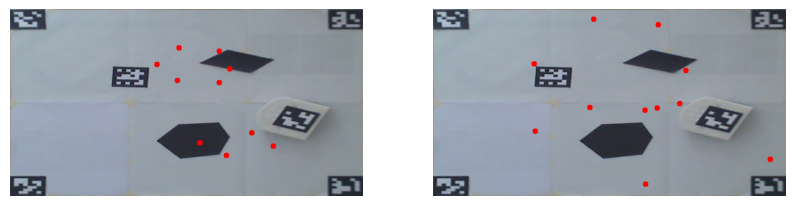

In [5]:
# Create a map
m = Map(cam)
# Find the obstacles
m.findObstacles(number_of_obstacles=2)
# Create a map with the obstacles vertices
map_with_obstacles = frame_cut.copy()
# Draw the original obstacles on the map_with_obstacles
for obstacle in m.obstacles_original:
    for p in obstacle:
        pinv = p.copy()
        # Invert the y coordinate
        pinv[1] = frame_cut.shape[0]-pinv[1]
        pinv = tuple(np.array(pinv).astype(int))
        cv2.circle(map_with_obstacles,pinv,5,(255,0,0),-1)
# Create a map with the enlarged obstacles
map_with_enlarged_obstacles = frame_cut.copy()
# Draw the enlarged obstacles on the map_with_enlarged_obstacles
for obstacle in m.obstacles:
    for p in obstacle:
        pinv = p.copy()
        # Invert the y coordinate
        #pinv[1] = frame_cut.shape[0]-pinv[1]
        pinv = tuple(np.array(pinv).astype(int))
        cv2.circle(map_with_enlarged_obstacles,pinv,5,(255,0,0),-1)
# Display the maps
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(map_with_obstacles)
ax[1].imshow(map_with_enlarged_obstacles)
# Remove the axis
for a in ax:
    a.axis("off")
plt.show()


#### 1.1.4 Final goal and initial position detection

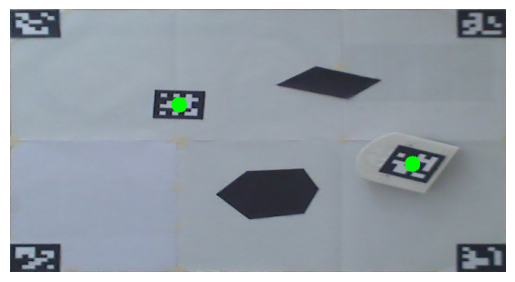

In [6]:
# Find initial and final positions
initial, final = m.getInitialFinalPoints()

# Display the initial and final positions
map_with_initial_final = frame_cut.copy()
# Draw the initial and final positions on the map_with_initial_final
for p in [initial,final]:
    pinv = p.copy()
    # Invert the y coordinate
    pinv[1] = frame_cut.shape[0]-pinv[1]
    pinv = tuple(np.array(pinv).astype(int))
    cv2.circle(map_with_initial_final,pinv,10,(0,255,0),-1)
# Display the map
plt.imshow(map_with_initial_final)
plt.axis("off")
plt.show()

#### 1.1.5 Map creation

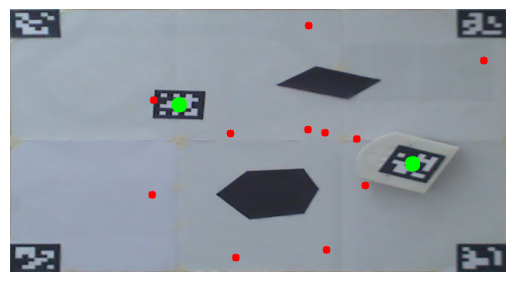

In [7]:
# Insert enlarged obstacles, initial and final positions in the map
fullMap = frame_cut.copy()

# Draw the enlarged obstacles on the fullMap
for obstacle in m.obstacles:
    for p in obstacle:
        # Invert the y coordinate
        p_inv = p.copy()
        p_inv[1] = frame_cut.shape[0]-p[1]
        p_inv = tuple(np.array(p_inv).astype(int))
        cv2.circle(fullMap,p_inv,5,(255,0,0),-1)

# Draw the initial and final positions on the fullMap
for p in [initial,final]:
    # Invert the y coordinate
    p_inv = p.copy()
    p_inv[1] = frame_cut.shape[0]-p[1]
    p_inv = tuple(np.array(p_inv).astype(int))
    cv2.circle(fullMap,p_inv,10,(0,255,0),-1)

# Display the map
plt.imshow(fullMap)
plt.axis("off")
plt.show()

### 1.2 Real time detection of position and orientation

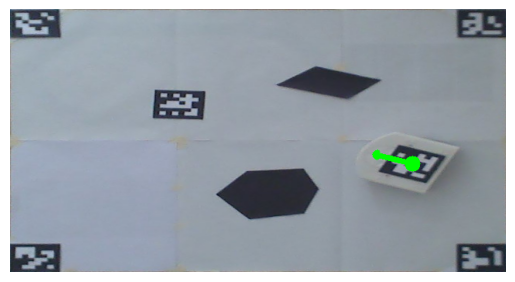

In [8]:
# Draw the position and the orientation
orientationPositionMap = frame_cut.copy()

# Obtain the position and the orientation
p,theta = m.cameraRobotSensing()

# Draw the robot position
p_inv = p.copy()
p_inv[1] = frame_cut.shape[0]-p[1]
p_inv = tuple(np.array(p_inv).astype(int))
cv2.circle(orientationPositionMap,p_inv,10,(0,255,0),-1)

# Draw the robot orientation
p2 = (p_inv[0]+50*np.cos(theta),p_inv[1]-50*np.sin(theta))
p2 = tuple(np.array(p2).astype(int))
cv2.arrowedLine(orientationPositionMap,p_inv,p2,(0,255,0),5)

# Display the map
plt.imshow(orientationPositionMap)
plt.axis("off")
plt.show()

## 2. Global Navigation
### 2.1 Needed variables definition

In [9]:
glob = Global(m.obstacles)

### 2.2 Creation of the visibility graph

In [10]:
# Create visibility graph,and plot it
glob.initialPoint = initial
glob.finalPoint = final

glob.plot_visibility()

TypeError: Global.find_visible_lines() missing 2 required positional arguments: 'initialPoint' and 'finalPoint'

### 2.3 Dijkstra algorithm

In [ ]:
glob.find_optimal_path(initial, final)
m.plot(initial, final, path= glob.optimal_path)

KeyError: 1

### 2.4 Global controller

## 3. Local Navigation

## 4. Filtering

#### Estimation of the covariance matrix of the camera

In [ ]:
# Import all the needed libraries
from vision.camera import *
from vision.map import *
from time import *
from time import *
import json
import sys, os

# Initialize the modules
cam = Camera()
map = Map(cam, number_of_obstacles=0, robot_size=0)

# Define some parameters for the experiments
N_iterations = 100
real_x = None
real_y = None
real_theta = None

print("Starting measurements...")

# Verify if the file exists
file_name = "measurements.json"
if not os.path.isfile(file_name):
    # Create the file
    with open(file_name,"w+") as file:
        file.write("{}")

# Open the files to save the data in
file_name = "measurements.json"
with open(file_name,"r+") as file:
    data = json.load(file)
    if data is None:
        data = {}

    # Get the index of the new data
    index = len(data)

    # Create a new entry for the new data
    data_collect = {}
    if real_x is not None and real_y is not None:
        data_collect["real_x"] = real_x
        data_collect["real_y"] = real_y
    if real_theta is not None:
        data_collect["real_theta"] = real_theta
    
    # Collect the measurements
    measurements = []
    for i in range(N_iterations):
        if i % 100 == 0 and i != 0:
            print("Iteration: {}/{}".format(i,N_iterations))
        p,theta = map.cameraRobotSensing()
        measurements.append({"p":p.tolist(),"theta":theta})

    # Save the measurements
    data_collect["measurements"] = measurements
    data[index] = data_collect

    # Delete all the data from measurements.json and save the new data
    file.seek(0)
    file.truncate()
    json.dump(data,file)

print("Done!")

Starting measurements...
Iteration: 0/100
Done!


## 5. Demo

In [1]:
from vision.map import * # Import map library
from tdmclient import ClientAsync # Import thymio library
from utils.exceptions import * # Import exceptions
from global_navigation.main import *
from local_navigation.localNav import *
from vision.camera import *
from utils.settings import *
from time import *
from filtering.kalman_filter import * # Import Kalman filter

##### Variables definition #####
start = goal = None

try:
    ##### Connection to the robot #####
    client = ClientAsync()
    node = await client.wait_for_node()
    await node.lock()

    ##### Map creation and variables definition #####
    cam = Camera()
    map = Map(cam, number_of_obstacles=3, robot_size=40)
    map.findObstacles()
    cam.obstacles = map.obstacles
    glob = Global(map.obstacles)
    #local = Local()

    ##### Loop #####
    while not glob.goal_reached:        
        # Final and initial position estimation and path planning
        if start is None or goal is None:
            start, goal = map.getInitialFinalPoints()
            glob.find_optimal_path(start, goal)
            cam.startPosition = start
            cam.goalPosition = goal
            cam.optimalPath = glob.optimal_path
            time_last_sample = time()
            time_sampling = None
            start_pos = np.array([start[0], start[1], 0])
            kalman = KalmanFilter(start_pos)
            continue

        # Sensing
        await node.wait_for_variables() # Wait for the sensors to be updated
        cameraPos_measured, cameraOrientation_measured = map.cameraRobotSensing() # Robot position and orientation from the camera
        #prox_horizontal_measured = node["prox.horizontal"] # Horizontal proximity sensors
        #imu_measured = node["acc"] # Accelerometer
        left_speed_measured = node["motor.left.speed"] # Motor speed
        right_speed_measured = node["motor.right.speed"]
        # See if the robot has been kidnapped
        if False:
            print("Kidnapped")
            # Turn off the motors
            v = { "motor.left.target": [round(0)], "motor.right.target": [round(0)] }
            # Kidnapping management
            old_cameraPos = cameraPos_measured
            while True:
                await client.sleep(1)
                await node.wait_for_variables()
                cameraPos_measured,_ = map.cameraRobotSensing()
                if cameraPos_measured != None and np.linalg.norm(cameraPos_measured-old_cameraPos).all() <= KIDNAPPING_CONV_THRESH and 21 <= node["acc"][2] <= 25:
                    break
                else:
                    old_cameraPos = cameraPos_measured

            # Force a new path planning
            start = None
            goal = None

            print("Kidnapped solved")

            continue
            # Compute the new position and orientation to display
            cameraPos_measured, cameraOrientation_measured = map.cameraRobotSensing()
        else:
            # Position estimation [TODO]
            if cameraPos_measured is None or cameraOrientation_measured is None:
                cam_x = cam_y = cam_theta = -1
            else:
                cam_x = cameraPos_measured[0]
                cam_y = cameraPos_measured[1]
                cam_theta = cameraOrientation_measured
            [pos_estimated_x, pos_estimated_y, pos_estimated_theta] = kalman.update_kalman(left_speed_measured, right_speed_measured, 'on', time_sampling, np.array([cam_x, cam_y, cam_theta]))
            cam.robotEstimatedPosition = np.array([pos_estimated_x, pos_estimated_y])
            cam.robotEstimatedOrientation = pos_estimated_theta
            # Control [TODO]
            #prox_horizontal = node["prox.horizontal"]
            if False: #local.local_obstacle(prox_horizontal):
                #motorLeft,motorRight = local.local_controller(prox_horizontal)
                pass
            else:
                motorLeft = motorRight = 0
                if not (cameraPos_measured is None or cameraOrientation_measured is None):
                    motorLeft,motorRight = glob.global_controller(cameraPos_measured, cameraOrientation_measured)
            # Actuation
            v = { "motor.left.target": [round(motorLeft)], "motor.right.target": [round(motorRight)] }
            await node.set_variables(v)
        print("Dif X : ", cameraPos_measured[0] - pos_estimated_x, "Dif Y : ", cameraPos_measured[1] - pos_estimated_y, "Dif Theta : ", cameraOrientation_measured - pos_estimated_theta)
        # Set all the parameters for real time display
        cam.robotMeasuredPosition = cameraPos_measured
        cam.robotMeasuredOrientation = cameraOrientation_measured
        if(cam.display()):
            break
        await client.sleep(0.1)

        # Time sampling
        time_sampling = time() - time_last_sample
        time_last_sample = time()
except Exception as e:
    print(e)
    # Print traceback
    import traceback
    traceback.print_exc()
finally:
    # Stop the robot
    v = { "motor.left.target": [round(0)], "motor.right.target": [round(0)] }
    await node.set_variables(v)

    # Unlock the robot
    await node.unlock()

    # Turn off the camera
    cam.release()
    
    cv2.destroyAllWindows()

Dif X :  0.0 Dif Y :  0.0 Dif Theta :  0.3606361448764801
Prev position :  [78. 91.  0.]  , Predicted position:  [120.0031215   91.          -3.93258427]  , Actual position:  [80.         91.          0.39838588]
Dif X :  -20.001560747623444 Dif Y :  0.0 Dif Theta :  2.1654850760202717
Prev position :  [100.00156075  91.          -1.76709919]  , Predicted position:  [95.68220312 72.02697431 -5.81204301]  , Actual position:  [83.         94.          0.45320493]
Dif X :  -6.341101558080865 Dif Y :  10.98651284503758 Dif Theta :  3.132623971848004
Prev position :  [89.34110156 83.01348715 -2.67941904]  , Predicted position:  [71.05329039 74.70476852 -5.82548646]  , Actual position:  [87.         95.          0.45320502]
Dif X :  7.9733548068060855 Dif Y :  10.147615741202586 Dif Theta :  3.1393457384926537
Prev position :  [79.02664519 84.85238426 -2.68614072]  , Predicted position:  [54.96979285 74.8639776  -7.85468005]  , Actual position:  [90.         97.          0.47239035]
Dif X : 